In [1]:
%matplotlib inline 
import pandas as pd
import numpy as np
import xarray as xr
import os
import glob
import time
import matplotlib as mpl
import matplotlib.pyplot as plt
# import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import norm
from dask.diagnostics import ProgressBar
from dask.distributed import Client, LocalCluster

In [2]:
flist = glob.glob('/Users/meganmason491/Documents/research/sierra/data/compiled_SUPERsnow_*150m*')#bsu
# flist = sorted(glob.glob('/Users/megmason/research/sierra/data/compiled_SUPERsnow_*150m*')) #mac
flist

['/Users/meganmason491/Documents/research/sierra/data/compiled_SUPERsnow_150m_dan.nc',
 '/Users/meganmason491/Documents/research/sierra/data/compiled_SUPERsnow_150m_sli.nc',
 '/Users/meganmason491/Documents/research/sierra/data/compiled_SUPERsnow_150m_tum.nc']

In [5]:
#open with MULTI-File
ds = xr.open_mfdataset(flist, concat_dim='met', combine='nested')#, chunks={'time':1,'x':1000,'y':1000})
stns = ['DAN', 'SLI', 'TUM'] #met station names
ds['met'] = (['met'], stns) #assign names and add as coords
ds.close()
ds

<xarray.Dataset>
Dimensions:  (met: 3, time: 51, x: 153, y: 153)
Coordinates:
    mask     (y, x) float64 dask.array<chunksize=(153, 153), meta=np.ndarray>
    dem      (y, x) float32 dask.array<chunksize=(153, 153), meta=np.ndarray>
    veg      (y, x) float32 dask.array<chunksize=(153, 153), meta=np.ndarray>
  * time     (time) datetime64[ns] 2013-04-03 2013-04-29 ... 2018-05-28
  * x        (x) float64 2.866e+05 2.866e+05 2.866e+05 ... 3.016e+05 3.016e+05
  * y        (y) float64 4.195e+06 4.195e+06 4.195e+06 ... 4.219e+06 4.219e+06
  * met      (met) <U3 'DAN' 'SLI' 'TUM'
Data variables:
    snow     (met, time, y, x) float64 dask.array<chunksize=(1, 51, 153, 153), meta=np.ndarray>

In [6]:
# open 3 different datasets
dan = xr.open_dataset(flist[0])
sli = xr.open_dataset(flist[1])
tum = xr.open_dataset(flist[2])

In [7]:
print(dan)
print(tum)
print(sli)

<xarray.Dataset>
Dimensions:  (time: 51, x: 51, y: 51)
Coordinates:
  * x        (x) float32 301431.0 301434.0 301437.0 ... 301578.0 301581.0
  * y        (y) float32 4196760.0 4196757.0 4196754.0 ... 4196613.0 4196610.0
  * time     (time) datetime64[ns] 2013-04-03 2013-04-29 ... 2018-05-28
    mask     (y, x) uint8 ...
    dem      (y, x) float32 ...
    veg      (y, x) float32 ...
Data variables:
    snow     (time, y, x) int16 ...
<xarray.Dataset>
Dimensions:  (time: 51, x: 51, y: 51)
Coordinates:
  * x        (x) float32 293409.0 293412.0 293415.0 ... 293556.0 293559.0
  * y        (y) float32 4194777.0 4194774.0 4194771.0 ... 4194630.0 4194627.0
  * time     (time) datetime64[ns] 2013-04-03 2013-04-29 ... 2018-05-28
    mask     (y, x) uint8 ...
    dem      (y, x) float32 ...
    veg      (y, x) float32 ...
Data variables:
    snow     (time, y, x) int16 ...
<xarray.Dataset>
Dimensions:  (time: 51, x: 51, y: 51)
Coordinates:
  * x        (x) float32 286635.0 286638.0 286641.0 ..

x direction length 14946.0 [m]:
y direction length 24276.0 [m]:


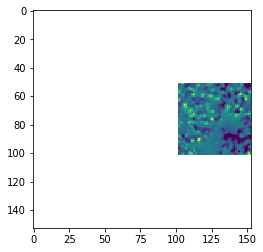

In [10]:
#mf dataset....x and y are whole basin!
f = ds.snow.isel(time=31)
f = f.sel(met='DAN')
plt.imshow(f)
print('x direction length {} [m]:'.format(f.x.max().values - f.x.min().values))
print('y direction length {} [m]:'.format(f.y.max().values - f.y.min().values))

<xarray.Dataset>
Dimensions:  (x: 51, y: 51)
Coordinates:
  * x        (x) float32 286635.0 286638.0 286641.0 ... 286782.0 286785.0
  * y        (y) float32 4218903.0 4218900.0 4218897.0 ... 4218756.0 4218753.0
    time     datetime64[ns] 2016-04-26
    mask     (y, x) uint8 ...
    dem      (y, x) float32 ...
    veg      (y, x) float32 ...
Data variables:
    snow     (y, x) int16 ...
x direction length 150.0 [m]:
y direction length 150.0 [m]:


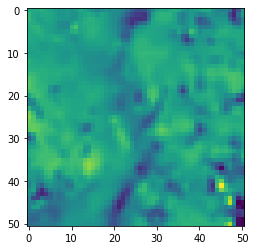

In [15]:
# open one dataset at a time
d = sli.isel(time=31)
print(d)
plt.imshow(d.snow)
print('x direction length {} [m]:'.format(sli.x.max().values - sli.x.min().values))
print('y direction length {} [m]:'.format(sli.y.max().values - sli.y.min().values))

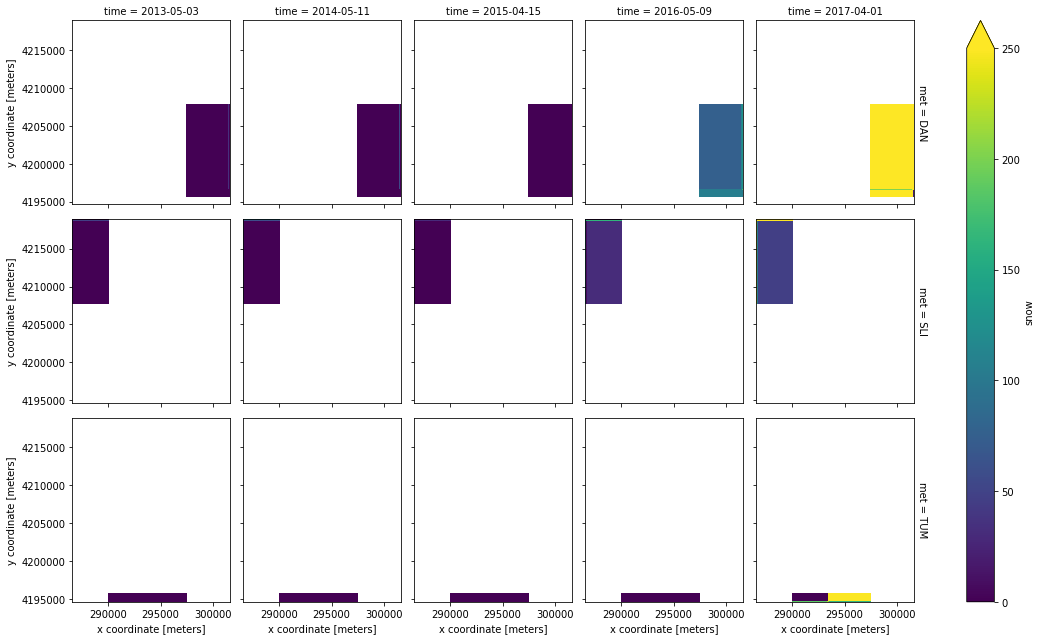

In [13]:
# awesome!! .. if I can get x and y extents correct
snow = ds.snow.isel(time=slice(2,51,10))
s = snow.plot(x='x', y='y', col='time', row='met', robust=True, vmax=250)

In [ ]:
#extra....

# #open data (MULTIFILE....)
# ds = xr.open_mfdataset(flist, concat_dim='met')#, chunks={'time':1,'x':1000,'y':1000})
# stns = ['DAN', 'SLI', 'TUM'] #met station names
# ds['met'] = (['met'], stns) #assign names and add as coords
# ds.close()
# ds

# for i in stns:
#     print(i)
#     ds.sel(met=stns).snow.plot()
#     plt.title('{}'.format(i))
#     plt.show()